#### Homework Solution for Week 3

In [1]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
raw_data = pd.read_csv("bank-full.csv", sep=";")
raw_data.columns = raw_data.columns.str.lower().str.replace(' ', '_')
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
used_columns = ["age", "job", "marital", "education", "balance", 
                "housing", "contact", "day", "month", "duration", 
                "campaign", "pdays", "previous", "poutcome", "y"]
sample_data = raw_data.loc[:, used_columns]
sample_data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
sample_data.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no missing values in the data

##### Question 1:

In [6]:
most_frequent = sample_data["education"].mode()[0]
print(f"The most frequent observation (mode) for the column education is [{most_frequent}]")

The most frequent observation (mode) for the column education is [secondary]


##### Question 2:

In [7]:
categorical_columns = sample_data.columns[sample_data.dtypes == "object"].values[:-1]
numerical_columns = sample_data.columns[sample_data.dtypes != "object"].values
categorical_columns, numerical_columns

(array(['job', 'marital', 'education', 'housing', 'contact', 'month',
        'poutcome'], dtype=object),
 array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
        'previous'], dtype=object))

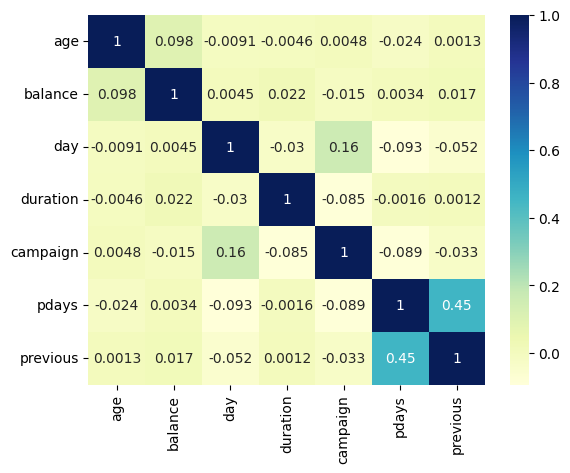

In [8]:
dataplot = sns.heatmap(sample_data[numerical_columns].corr(), cmap="YlGnBu", annot=True)

In [9]:
correlation_matrix = sample_data[numerical_columns].corr().mask(np.eye(len(numerical_columns), dtype = bool))
first_highest_corr_column = correlation_matrix.max().idxmax()
second_highest_corr_column = correlation_matrix.loc[:, first_highest_corr_column].idxmax()

print(f"The two features that have the biggest correlation are [{first_highest_corr_column}] and [{second_highest_corr_column}]")

The two features that have the biggest correlation are [pdays] and [previous]


##### Target Encoding, Splitting the dataset

In [10]:
sample_data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

# dict_transformer = DictVectorizer(sparse=False)
# dict_transformer.fit(sample_data.iloc[:, :-1].to_dict(orient="records"))
# X = dict_transformer.transform(sample_data.iloc[:, :-1].to_dict(orient="records"))

X = sample_data.iloc[:, :-1]
y = sample_data["y"].map({'yes': 1.0, 'no': 0.0})

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

##### Question 3

In [13]:
from sklearn.metrics import mutual_info_score

mutual_info = lambda x_col: np.round(mutual_info_score(x_col, y_train), decimals=2)
categorical_mi = X_train[categorical_columns].apply(mutual_info)
categorical_mi.sort_values(ascending=False)

poutcome     0.03
month        0.03
job          0.01
contact      0.01
housing      0.01
education    0.00
marital      0.00
dtype: float64

##### Question 4

In [14]:
dict_transformer = DictVectorizer(sparse=False)
dict_transformer.fit(X_train.to_dict(orient="records"))

x_train = dict_transformer.transform(X_train.to_dict(orient="records"))
x_val = dict_transformer.transform(X_val.to_dict(orient="records"))
x_test = dict_transformer.transform(X_test.to_dict(orient="records"))

dict_transformer.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [16]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [17]:
original_score = model.score(x_val, y_val)
print(f"The accuracy on the validation dataset = {original_score}")

The accuracy on the validation dataset = 0.9010174740101747


##### Question 5

In [18]:
model_scores_drop = []
for elimination_column in X_train.columns:
    
    dict_transformer = DictVectorizer(sparse=False)
    dict_transformer.fit(X_train.drop([elimination_column], axis=1).to_dict(orient="records"))
    
    x_train = dict_transformer.transform(X_train.drop([elimination_column], axis=1).to_dict(orient="records"))
    x_val = dict_transformer.transform(X_val.drop([elimination_column], axis=1).to_dict(orient="records"))
    x_test = dict_transformer.transform(X_test.drop([elimination_column], axis=1).to_dict(orient="records"))
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42).fit(x_train, y_train)
    model_scores_drop.append(np.abs(original_score-model.score(x_val, y_val)))
    print(f"Eliminating {elimination_column}:   Validation Accuracy Drop by = {np.round(model_scores_drop[-1], decimals=6)}")

Eliminating age:   Validation Accuracy Drop by = 0.0
Eliminating job:   Validation Accuracy Drop by = 0.000111
Eliminating marital:   Validation Accuracy Drop by = 0.000774
Eliminating education:   Validation Accuracy Drop by = 0.0
Eliminating balance:   Validation Accuracy Drop by = 0.000221
Eliminating housing:   Validation Accuracy Drop by = 0.0
Eliminating contact:   Validation Accuracy Drop by = 0.000664
Eliminating day:   Validation Accuracy Drop by = 0.000553
Eliminating month:   Validation Accuracy Drop by = 0.001438
Eliminating duration:   Validation Accuracy Drop by = 0.010949
Eliminating campaign:   Validation Accuracy Drop by = 0.000774
Eliminating pdays:   Validation Accuracy Drop by = 0.000332
Eliminating previous:   Validation Accuracy Drop by = 0.000221
Eliminating poutcome:   Validation Accuracy Drop by = 0.007742


In [19]:
print(f"{X_train.columns[np.argmin(model_scores_drop)]} has the smallest difference")

age has the smallest difference


##### Question 6

In [20]:
C = [0.01, 0.1, 1, 10, 100]
model_val_accuracy = []

dict_transformer = DictVectorizer(sparse=False)
dict_transformer.fit(X_train.to_dict(orient="records"))

x_train = dict_transformer.transform(X_train.to_dict(orient="records"))
x_val = dict_transformer.transform(X_val.to_dict(orient="records"))
x_test = dict_transformer.transform(X_test.to_dict(orient="records"))
    
for lambda_reg in C:
    model = LogisticRegression(solver='liblinear', C=lambda_reg, max_iter=1000, random_state=42).fit(x_train, y_train)
    model_val_accuracy.append(model.score(x_val, y_val))
    print(f"Running model with Regularization = {lambda_reg} ->   Validation Accuracy = {np.round(model_val_accuracy[-1], decimals=3)}")

Running model with Regularization = 0.01 ->   Validation Accuracy = 0.899
Running model with Regularization = 0.1 ->   Validation Accuracy = 0.9
Running model with Regularization = 1 ->   Validation Accuracy = 0.901
Running model with Regularization = 10 ->   Validation Accuracy = 0.901
Running model with Regularization = 100 ->   Validation Accuracy = 0.901


In [21]:
print(f"{C[np.argmax(model_val_accuracy)]} leads to the best accuracy on the validation set")

10 leads to the best accuracy on the validation set


#### End of Task! Looking forward to solving the next assignment